In [53]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [54]:
# 1. ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
source_root = r"C:\Users\USER\Desktop\47.Î¨ºÎ•òÍ≥µÍ∞Ñ ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞\3.Í∞úÎ∞©Îç∞Ïù¥ÌÑ∞\1.Îç∞Ïù¥ÌÑ∞\Validation\01.ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞"
label_root  = r"C:\Users\USER\Desktop\47.Î¨ºÎ•òÍ≥µÍ∞Ñ ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞\3.Í∞úÎ∞©Îç∞Ïù¥ÌÑ∞\1.Îç∞Ïù¥ÌÑ∞\Validation\02.ÎùºÎ≤®ÎßÅÎç∞Ïù¥ÌÑ∞"

In [55]:
# 2. Ïù¥ÎØ∏ÏßÄ Ïù∏Îç±Ïã±
img_map = {}
for dirpath, _, filenames in os.walk(source_root):
    for fname in filenames:
        if fname.endswith('.jpg'):
            img_map[fname] = os.path.join(dirpath, fname)

In [56]:
# 3. JSONÍ≥º Ïù¥ÎØ∏ÏßÄ Îß§Ïπ≠
pairs = []
for dirpath, _, filenames in os.walk(label_root):
    for fname in filenames:
        if fname.endswith('.json'):
            json_path = os.path.join(dirpath, fname)
            try:
                with open(json_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                file_name = data['images'][0]['file_name']
                if file_name in img_map:
                    pairs.append((img_map[file_name], json_path))
            except Exception as e:
                continue

print(f"‚úÖ Ï¥ù Îß§Ïπ≠Îêú Ïù¥ÎØ∏ÏßÄ-ÎùºÎ≤® Ïàò: {len(pairs)}Í∞ú")

‚úÖ Ï¥ù Îß§Ïπ≠Îêú Ïù¥ÎØ∏ÏßÄ-ÎùºÎ≤® Ïàò: 6049Í∞ú


In [62]:
# 4. ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÏó¨ ÏãúÍ∞ÅÌôî Î∞è Î©¥Ï†Å Ï∏°Ï†ï
index = 3  # ÏõêÌïòÎäî Ïù∏Îç±Ïä§Î°ú Î≥ÄÍ≤Ω Í∞ÄÎä•
img_path, json_path = pairs[index]

In [63]:
# Ïù¥ÎØ∏ÏßÄ Î°úÎìú (PILÎ°ú ÌïúÍ∏Ä Í≤ΩÎ°ú ÎåÄÏùë)
try:
    pil_img = Image.open(img_path).convert("RGB")
    image_rgb = np.array(pil_img)
except Exception as e:
    print(f"[‚ùå] Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {img_path}")
    raise e

Text(0.5, 1.0, '01010101_8801052121161_2_1.jpg')

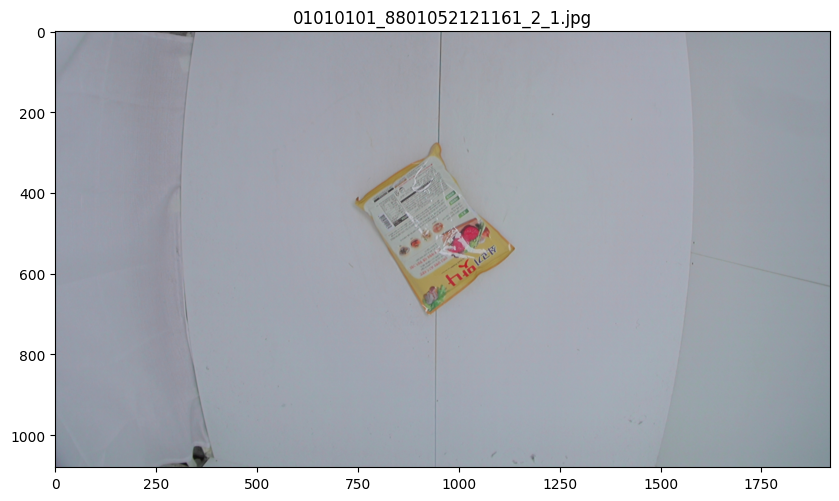

In [64]:
# JSON Î°úÎìú
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title(data['images'][0]['file_name'])

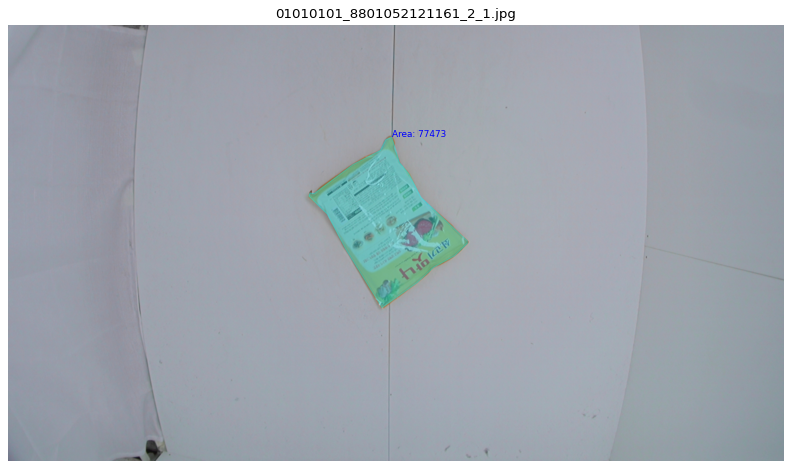

In [65]:
# Ïù¥ÎØ∏ÏßÄ Î°úÎìú
image = Image.open(img_path).convert('RGB')  # PIL Î∞©Ïãù ÏÇ¨Ïö©
plt.figure(figsize=(10, 6), dpi=80)           # figsize Ï§ÑÏù¥Í≥†, DPI ÎÇÆÏ∂§
plt.imshow(image)
plt.title(data['images'][0]['file_name'])

# Segmentation ÌëúÏãú Î∞è Î©¥Ï†Å Í≥ÑÏÇ∞ (ÏµúÎåÄ 5Í∞úÎßå ÌëúÏãú)
for i, ann in enumerate(data['annotations']):
    if i >= 5: break  # ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ï§ëÎã® (Î©îÎ™®Î¶¨ Î∞©ÏßÄ)
    
    seg = np.array(ann['segmentation'][0], dtype=np.int32).reshape(-1, 2)
    area = cv2.contourArea(seg.astype(np.float32))  # Î©¥Ï†Å Í≥ÑÏÇ∞

    # Ìè¥Î¶¨Í≥§ ÏãúÍ∞ÅÌôî
    poly = Polygon(seg, edgecolor='cyan', facecolor='cyan', alpha=0.3)
    plt.gca().add_patch(poly)

    # Ìè¥Î¶¨Í≥§ ÏïàÏóê Î©¥Ï†Å ÌëúÏãú
    x, y = seg[0]
    plt.text(x, y, f"Area: {int(area)}", color='blue', fontsize=8)

plt.axis('off')
plt.tight_layout()
plt.show()


üñºÔ∏è Ïù¥ÎØ∏ÏßÄ 1: 01010101_8801052121161_1_1.jpg


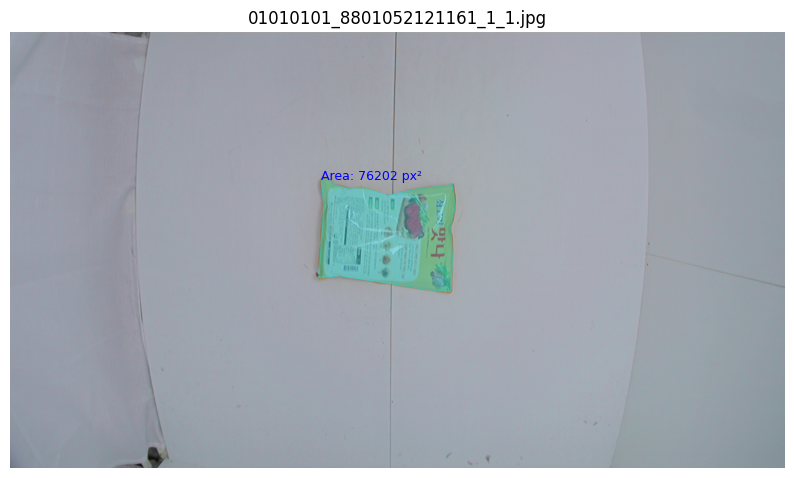


üñºÔ∏è Ïù¥ÎØ∏ÏßÄ 2: 01010101_8801052121161_1_2.jpg


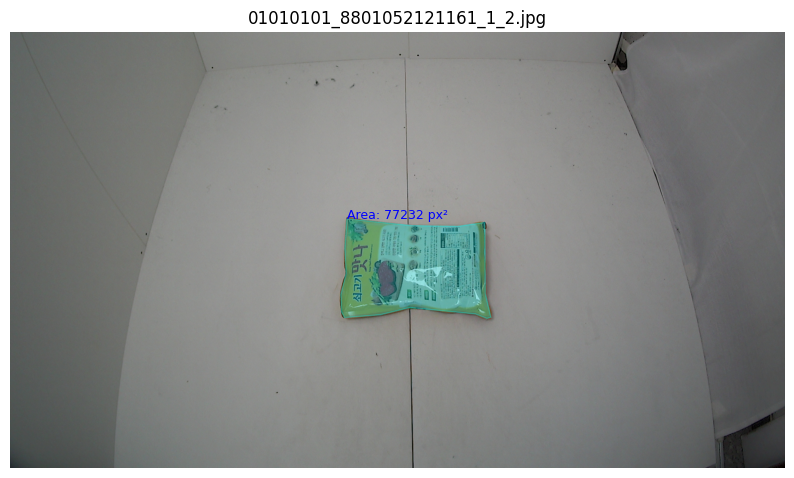


üñºÔ∏è Ïù¥ÎØ∏ÏßÄ 3: 01010101_8801052121161_1_3.jpg


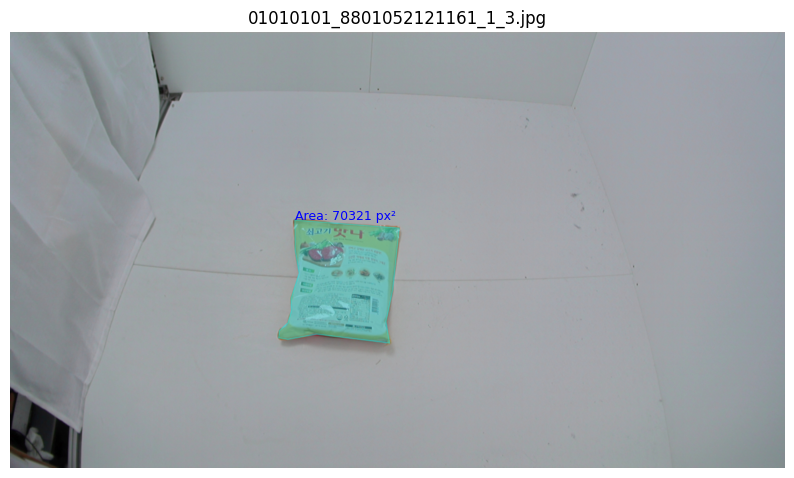


üñºÔ∏è Ïù¥ÎØ∏ÏßÄ 4: 01010101_8801052121161_2_1.jpg


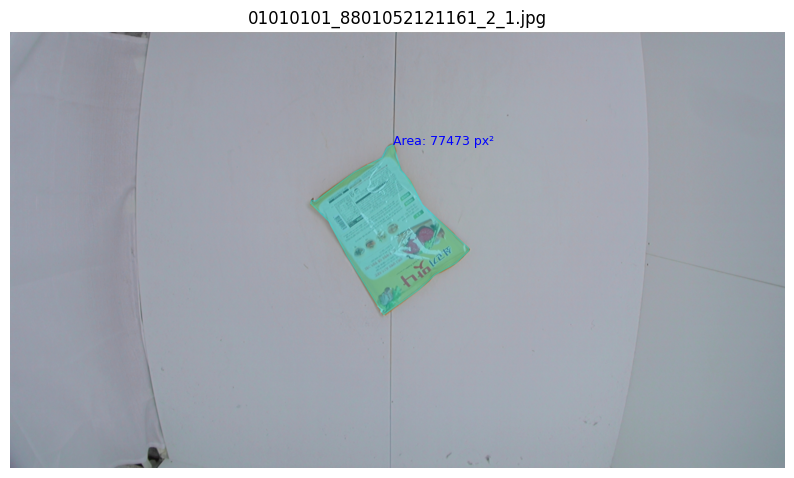


üñºÔ∏è Ïù¥ÎØ∏ÏßÄ 5: 01010101_8801052121161_2_2.jpg


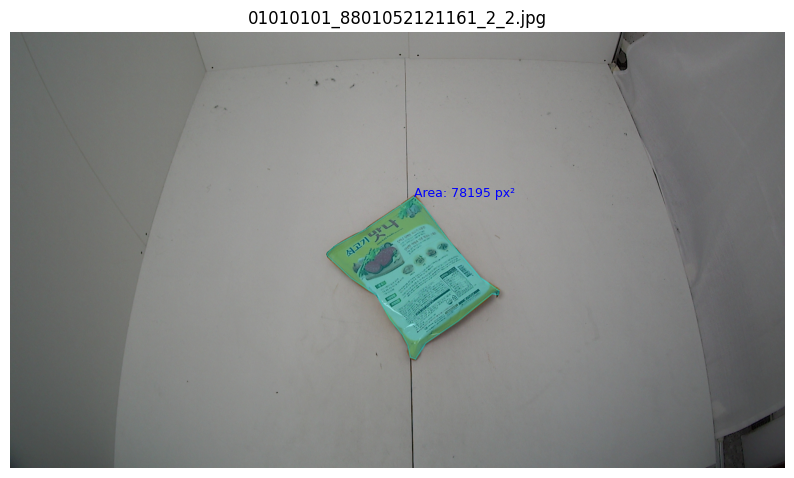

In [61]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cv2  # Î©¥Ï†Å Í≥ÑÏÇ∞Ïö©

# pairs Î¶¨Ïä§Ìä∏Ïóê (img_path, json_path) ÏåçÏù¥ Ï°¥Ïû¨Ìï¥Ïïº Ìï®
# Ïòà: pairs = [(img1, json1), (img2, json2), ...]

def visualize_segmentation_and_area(img_path, json_path):
    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    try:
        image = Image.open(img_path).convert("RGB")
    except:
        print(f"[‚ùå] Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {img_path}")
        return

    # ÎùºÎ≤® Î°úÎìú
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except:
        print(f"[‚ùå] JSON Î°úÎìú Ïã§Ìå®: {json_path}")
        return

    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title(data['images'][0]['file_name'])

    # ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Î∞è Î©¥Ï†Å ÌëúÏãú
    for ann in data['annotations']:
        seg = np.array(ann['segmentation'][0]).reshape(-1, 2)
        area = cv2.contourArea(seg.astype(np.float32))
        poly = Polygon(seg, edgecolor='cyan', facecolor='cyan', alpha=0.3)
        plt.gca().add_patch(poly)
        x, y = seg[0]
        plt.text(x, y, f"Area: {int(area)} px¬≤", color='blue', fontsize=9)

    plt.axis('off')
    plt.show()

# ‚úÖ ÏòàÏãú: Ï≤´ 5Ïû•Îßå ÌôïÏù∏
for i, (img_path, json_path) in enumerate(pairs[:5]):
    print(f"\nüñºÔ∏è Ïù¥ÎØ∏ÏßÄ {i+1}: {os.path.basename(img_path)}")
    visualize_segmentation_and_area(img_path, json_path)